In [830]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [831]:
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [832]:
print(train.shape)

(1100, 81)


In [833]:
print(test.shape)

(360, 80)


In [834]:
Ytrain = train['SalePrice']

In [835]:
train.drop(columns=['SalePrice'],inplace=True)

In [836]:
print(train.shape)
print(test.shape)

(1100, 80)
(360, 80)


In [837]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [838]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [839]:
dataset = [train,test]

In [840]:
dataset = pd.concat(dataset)

In [841]:
print(dataset.shape)

(1460, 80)


In [842]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [843]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 359
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-nu

In [844]:
mean = float(round(np.mean(dataset['LotFrontage'])))

In [845]:
print(mean)

70.0


In [846]:
dataset['LotFrontage'].fillna(value=mean,inplace=True)

In [847]:
print(dataset['Alley'].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64


In [848]:
dataset['Alley'].fillna(value='NA',inplace=True)

In [849]:
print(dataset['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [850]:
dataset['MasVnrType'].fillna('None',inplace=True)

In [851]:
dataset['MasVnrArea'].fillna(0.0,inplace=True)

In [852]:
dataset['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [853]:
dataset['BsmtQual'].fillna(value='TA',inplace=True)

In [854]:
dataset['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [855]:
dataset['BsmtCond'].fillna(value='TA',inplace=True)

In [856]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 359
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [857]:
dataset['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [858]:
dataset['BsmtExposure'].fillna(value='No',inplace=True)

In [859]:
dataset['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [860]:
dataset['BsmtFinType1'].fillna(value='Unf',inplace=True)

In [861]:
dataset['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [862]:
dataset['BsmtFinType2'].fillna(value='Unf',inplace=True)

In [863]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 359
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [864]:
dataset['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [865]:
dataset['Electrical'].fillna(value='SBrkr',inplace=True)

In [866]:
dataset['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [867]:
dataset['FireplaceQu'].fillna(value='Gd',inplace=True)

In [868]:
dataset['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [869]:
dataset['GarageType'].fillna(value='Attchd',inplace=True)

In [870]:
dataset['GarageYrBlt'].fillna(value=float(round(np.mean(dataset['GarageYrBlt']))),inplace=True)

In [871]:
dataset['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [872]:
dataset['GarageFinish'].fillna(value='Unf',inplace=True)

In [873]:
dataset['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [874]:
dataset['GarageQual'].fillna(value='TA',inplace=True)

In [875]:
dataset['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [876]:
dataset['GarageCond'].fillna(value='TA',inplace=True)

In [877]:
dataset['PoolQC'].fillna(value='NA',inplace=True)

In [878]:
dataset.drop(columns=['Fence','MiscFeature','Id'],inplace=True)

In [879]:
print(dataset.shape)

(1460, 77)


In [880]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [881]:
categorical_encoding = dataset.dtypes == 'object'

In [882]:
print(categorical_encoding)

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
Alley             True
LotShape          True
LandContour       True
Utilities         True
LotConfig         True
LandSlope         True
Neighborhood      True
Condition1        True
Condition2        True
BldgType          True
HouseStyle        True
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle         True
RoofMatl          True
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea       False
ExterQual         True
ExterCond         True
Foundation        True
BsmtQual          True
                 ...  
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGrd     False
Functional        True
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt      False
GarageFinis

In [883]:
categorical_encoding[0] = True

In [884]:
print(categorical_encoding)

MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
Alley             True
LotShape          True
LandContour       True
Utilities         True
LotConfig         True
LandSlope         True
Neighborhood      True
Condition1        True
Condition2        True
BldgType          True
HouseStyle        True
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle         True
RoofMatl          True
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea       False
ExterQual         True
ExterCond         True
Foundation        True
BsmtQual          True
                 ...  
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGrd     False
Functional        True
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt      False
GarageFinis

In [885]:
categorical_encoding = categorical_encoding.tolist()

In [886]:
print(categorical_encoding)

[True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, True, True]


In [887]:
categorical_columns = dataset.columns[categorical_encoding].tolist()

In [888]:
print(categorical_columns)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']


In [889]:
le = LabelEncoder()

In [890]:
dataset[categorical_columns] = dataset[categorical_columns].apply(le.fit_transform)

In [891]:
print(dataset.shape)

(1460, 77)


In [892]:
ohe = OneHotEncoder(categorical_features=categorical_encoding,sparse=False)

In [893]:
dataset = ohe.fit_transform(dataset)

/home/yatin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [894]:
print(dataset.shape)

(1460, 296)


In [895]:
X_train = dataset[:1100,:]
Xtest = dataset[1100:,:]

In [896]:
print(X_train.shape)
print(Xtest.shape)

(1100, 296)
(360, 296)


In [897]:
Ytrain = np.array(Ytrain)

In [898]:
print(Ytrain.shape)

(1100,)


In [899]:
print(type(Ytrain))

<class 'numpy.ndarray'>


In [900]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [901]:
model = Sequential()

In [902]:
model.add(Dense(800,activation='relu',input_dim=296))
model.add(Dense(500,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))

In [903]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 800)               237600    
_________________________________________________________________
dense_62 (Dense)             (None, 500)               400500    
_________________________________________________________________
dense_63 (Dense)             (None, 600)               300600    
_________________________________________________________________
dense_64 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_65 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_67 (Dense)             (None, 50)               

In [904]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [905]:
modelCheckPoint = ModelCheckpoint('model.h5',monitor='val_mae',verbose=1,save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_mae',min_delta=0.05,patience=10,verbose=1,restore_best_weights=True)
callbacks=[modelCheckPoint,earlyStopping]

In [906]:
hist = model.fit(X_train,Ytrain,batch_size=128,epochs=40)

Train on 1100 samples
Epoch 1/40
1100/1100 [==============================] - 0s 365us/sample - loss: 33381588463.2436 - mae: 163397.5781
Epoch 2/40
1100/1100 [==============================] - 0s 96us/sample - loss: 12578556596.5964 - mae: 58460.3438
Epoch 3/40
1100/1100 [==============================] - 0s 101us/sample - loss: 7562201047.0400 - mae: 58427.2969
Epoch 4/40
1100/1100 [==============================] - 0s 93us/sample - loss: 4518937611.1709 - mae: 46004.6094
Epoch 5/40
1100/1100 [==============================] - 0s 98us/sample - loss: 3618583868.5091 - mae: 43864.3594
Epoch 6/40
1100/1100 [==============================] - 0s 95us/sample - loss: 3334128909.0327 - mae: 42365.5625
Epoch 7/40
1100/1100 [==============================] - 0s 110us/sample - loss: 3150488420.5382 - mae: 40274.7070
Epoch 8/40
1100/1100 [==============================] - 0s 95us/sample - loss: 2782238887.5636 - mae: 37574.9688
Epoch 9/40
1100/1100 [==============================] - 0s 105us/sam

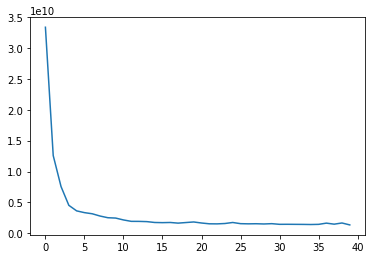

In [907]:
plt.plot(hist.history['loss'])
plt.show()

In [908]:
model.evaluate(X_train,Ytrain)

1100/1100 [==============================] - 0s 127us/sample - loss: 1347747273.0764 - mae: 24684.3066


[1347747273.0763636, 24684.307]

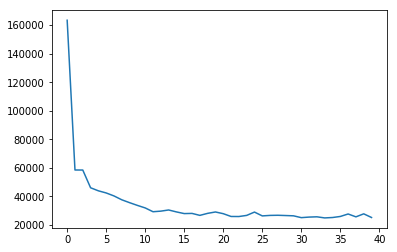

In [909]:
plt.plot(hist.history['mae'])
plt.show()

In [914]:
Ytest = model.predict(Xtest)

In [915]:
print(Ytest.shape)

(360, 1)


In [916]:
print(Ytest)

[[ 59000.496]
 [110098.65 ]
 [126834.42 ]
 [118175.11 ]
 [123607.05 ]
 [332603.16 ]
 [177426.23 ]
 [194526.02 ]
 [169020.61 ]
 [289960.47 ]
 [167473.1  ]
 [207918.58 ]
 [105720.7  ]
 [119721.81 ]
 [103779.13 ]
 [275209.75 ]
 [137607.81 ]
 [121736.6  ]
 [145542.77 ]
 [109218.8  ]
 [107802.95 ]
 [216442.52 ]
 [105394.67 ]
 [ 81555.34 ]
 [135591.   ]
 [132550.67 ]
 [200367.22 ]
 [212568.39 ]
 [189178.61 ]
 [146064.83 ]
 [222366.19 ]
 [101454.54 ]
 [185533.45 ]
 [216335.55 ]
 [163478.67 ]
 [108484.31 ]
 [126281.016]
 [ 79508.266]
 [244575.28 ]
 [128293.89 ]
 [148539.11 ]
 [194518.52 ]
 [378449.72 ]
 [102560.625]
 [106164.67 ]
 [142835.47 ]
 [175044.61 ]
 [141341.31 ]
 [ 91260.56 ]
 [139758.27 ]
 [ 95132.625]
 [188428.17 ]
 [150864.56 ]
 [104067.11 ]
 [212867.1  ]
 [197054.39 ]
 [159162.98 ]
 [197440.75 ]
 [213177.73 ]
 [198515.88 ]
 [139285.94 ]
 [211564.58 ]
 [118651.34 ]
 [160828.05 ]
 [184883.14 ]
 [202617.62 ]
 [229533.77 ]
 [180993.33 ]
 [218902.08 ]
 [427446.78 ]
 [139054.3  ]
 [1604

In [917]:
label = []

In [918]:
for i in range(1101,1461):
    label.append(i)

In [919]:
label = np.array(label)

In [920]:
df1 = pd.DataFrame(data=label,columns=['Id'])

In [921]:
df1.head()

,Id
0,1101
1,1102
2,1103
3,1104
4,1105


In [922]:
df2 = pd.DataFrame(data=Ytest,columns=['SalePrice'])

In [923]:
df2.head()

,SalePrice
0,59000.496094
1,110098.648438
2,126834.421875
3,118175.109375
4,123607.046875


In [924]:
df = pd.concat([df1,df2],axis=1)

In [925]:
df.head()

,Id,SalePrice
0,1101,59000.496094
1,1102,110098.648438
2,1103,126834.421875
3,1104,118175.109375
4,1105,123607.046875


In [926]:
print(df.shape)

(360, 2)


In [927]:
df.to_csv('submit6.csv',index=False)